In [72]:
import requests
import numpy as np
import pandas as pd

from time import sleep

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import classification_report
import string
import random
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from imageio import imread
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC 
%matplotlib inline

In [2]:
df=pd.read_csv('../rotten-tomatoes-dataset/rotten_tomatoes_reviews_sample.csv')

In [3]:
df['tokens'] = df['Review'].apply(nltk.word_tokenize)

In [4]:
df

,Freshness,Review,tokens
0,rotten,The muddled mental states of the characters (...,"[The, muddled, mental, states, of, the, charac..."
1,fresh,The Big Wedding is an occasionally charming a...,"[The, Big, Wedding, is, an, occasionally, char..."
2,fresh,While 'Captain Phillips' is certainly a thril...,"[While, 'Captain, Phillips, ', is, certainly, ..."
3,rotten,A more mean-spirited and tongue-in-cheek B-mo...,"[A, more, mean-spirited, and, tongue-in-cheek,..."
4,fresh,It's easy to poke fun at some of the more far...,"[It, 's, easy, to, poke, fun, at, some, of, th..."
...,...,...,...
9995,rotten,Bugsy Malone... but without the bubble guns.....,"[Bugsy, Malone, ..., but, without, the, bubble..."
9996,fresh,Angelina Jolie shines in all of the action re...,"[Angelina, Jolie, shines, in, all, of, the, ac..."
9997,fresh,Fassbender was compelling as Rochester in Jan...,"[Fassbender, was, compelling, as, Rochester, i..."
9998,rotten,"A slight improvement over the 2008 original, ...","[A, slight, improvement, over, the, 2008, orig..."


In [5]:
# your code
stop_words = set(stopwords.words('english'))

for i in ["''","`","``","n\'t","...","’","”","”",'“',"--","‘","//", "http", "https", "\'s"]:
    stop_words.add(i)

for i in string.punctuation:
    stop_words.add(i)


In [6]:
def remove_stop_words(text):
    return [word.lower() for word in text if word.lower() not in stop_words]

In [7]:
stop_words

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'s",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '...',
 '/',
 '//',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'https',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 '

In [8]:
df['tokens'] = df['tokens'].apply(remove_stop_words)

In [9]:

fresh_tokens = df[df['Freshness'] == 'fresh']
rotten_tokens = df[df['Freshness'] == 'rotten']

f_tokes = [item for sublist in list(fresh_tokens['tokens']) for item in sublist]

r_tokes = [item for sublist in list(rotten_tokens['tokens']) for item in sublist]

In [10]:
#same as above
def freq_table(text1, text2, text1_name="", text2_name="", limit=None, hapaxes=False):

    freqs1 = nltk.FreqDist(text1).most_common(limit)
    freqs2 = nltk.FreqDist(text2).most_common(limit)
    prob1 = [round(x[1]/len(freqs1),2) for x in freqs1]
    prob2 = [round(x[1]/len(freqs2),2) for x in freqs2]

    freq1 = zip(freqs1, prob1)
    freq2 = zip(freqs2, prob2)

    freqs = [freq1, freq2]
    
    comp_freqs = []
    for f in freqs:
        for s,p in f:
            comp_freqs.append([s[0],s[1],p])
    
    cfreq1 = comp_freqs[:26]
    cfreq2 = comp_freqs[26:]

    print(f'  {text1_name.upper()} \t\t    {text2_name.upper()}')

    for i in zip(cfreq1, cfreq2):
        print(i[0], " "*(25-len(str(i[0]))),i[1])

In [11]:
freq_table(f_tokes, r_tokes, "fresh", "rotten", 26)

  FRESH 		    ROTTEN
['film', 886, 34.08]       ['film', 763, 29.35]
['movie', 498, 19.15]      ['movie', 688, 26.46]
['one', 397, 15.27]        ['like', 418, 16.08]
['like', 286, 11.0]        ['one', 383, 14.73]
['story', 255, 9.81]       ['much', 298, 11.46]
['good', 208, 8.0]         ['story', 289, 11.12]
['best', 198, 7.62]        ['even', 242, 9.31]
['even', 188, 7.23]        ['good', 183, 7.04]
['full', 172, 6.62]        ['enough', 176, 6.77]
['way', 169, 6.5]          ['make', 175, 6.73]
['time', 164, 6.31]        ['little', 172, 6.62]
['much', 162, 6.23]        ['never', 170, 6.54]
['comedy', 155, 5.96]      ['time', 160, 6.15]
['director', 153, 5.88]    ['characters', 159, 6.12]
['fun', 152, 5.85]         ['comedy', 156, 6.0]
['may', 152, 5.85]         ['could', 143, 5.5]
['make', 148, 5.69]        ['bad', 142, 5.46]
['great', 148, 5.69]       ['feels', 136, 5.23]
['new', 147, 5.65]         ['would', 134, 5.15]
['makes', 146, 5.62]       ['really', 132, 5.08]
['us', 144, 5.54]

In [12]:
fdist_fresh = nltk.FreqDist(f_tokes)

fdist_rotten = nltk.FreqDist(r_tokes)

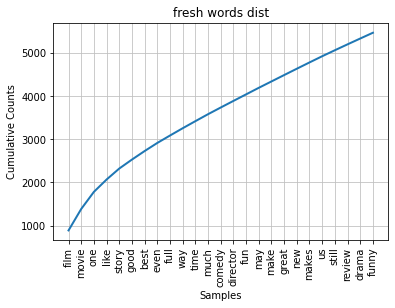

In [13]:
fdist_fresh.plot(25, cumulative=True, title="fresh words dist");

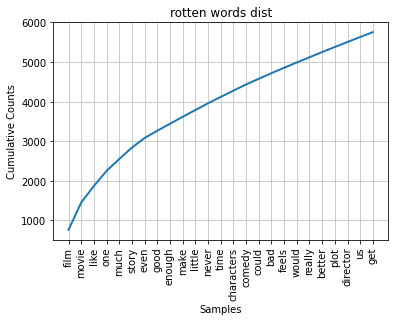

In [14]:
fdist_rotten.plot(25, cumulative=True, title="rotten words dist")

In [15]:
df

,Freshness,Review,tokens
0,rotten,The muddled mental states of the characters (...,"[muddled, mental, states, characters, audience..."
1,fresh,The Big Wedding is an occasionally charming a...,"[big, wedding, occasionally, charming, overall..."
2,fresh,While 'Captain Phillips' is certainly a thril...,"['captain, phillips, certainly, thrilling, com..."
3,rotten,A more mean-spirited and tongue-in-cheek B-mo...,"[mean-spirited, tongue-in-cheek, b-movie, pred..."
4,fresh,It's easy to poke fun at some of the more far...,"[easy, poke, fun, far-fetched, scenes, times, ..."
...,...,...,...
9995,rotten,Bugsy Malone... but without the bubble guns.....,"[bugsy, malone, without, bubble, guns, affleck..."
9996,fresh,Angelina Jolie shines in all of the action re...,"[angelina, jolie, shines, action, requirements..."
9997,fresh,Fassbender was compelling as Rochester in Jan...,"[fassbender, compelling, rochester, jane, eyre..."
9998,rotten,"A slight improvement over the 2008 original, ...","[slight, improvement, 2008, original, saying, ..."


In [16]:
X=df['Review']
y=df['Freshness'].map(lambda x:1 if x=='fresh' else 0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [18]:
y.value_counts()

1    5000
0    5000
Name: Freshness, dtype: int64

In [19]:
cvec = CountVectorizer()

Modeling

In [20]:
lr=LogisticRegression()
gnb=GaussianNB()
mnb=MultinomialNB()

In [21]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=10_000))
])

In [34]:
pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer ()),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=10_000))
])

In [41]:

cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000,10_000],
    'cvec__stop_words': [None, 'english',stop_words],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [42]:
tfidf_params={
    'tfidf__max_features': [2_000, 3_000, 4_000, 5_000,10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english', stop_words]}

In [23]:
pipe_1_gs = GridSearchCV(pipe1, 
                  param_grid=cvec_params,
                  cv=5)

In [36]:
pipe_2_gs = GridSearchCV(pipe2, 
                  param_grid=tfidf_params,
                  cv=5)

In [24]:
pipe_1_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [25]:
print(pipe_1_gs.best_score_)


0.706865671641791


In [26]:

pipe_1_gs.best_params_

{'cvec__max_features': 10000,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [30]:
pipe_1_model = pipe_1_gs.best_estimator_

In [37]:
pipe_2_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [38]:
print(pipe_2_gs.best_score_)

0.7144776119402986


In [39]:

pipe_2_gs.best_params_

{'tfidf__max_features': 10000,
 'tfidf__ngram_range': (1, 1),
 'tfidf__stop_words': None}

In [40]:
pipe_2_model = pipe_2_gs.best_estimator_

Naive Baynes Modeling

In [43]:
class DenseTransformer():

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [44]:
cvec_multinomial_pipe=Pipeline([
    ('cvec', CountVectorizer()),
    ('to_dense', DenseTransformer()),
    ('mnb',MultinomialNB()),
])

In [45]:
tfidf_gaussian_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('nbc', GaussianNB())
])

In [47]:
cvec_multinomial_gs = GridSearchCV(cvec_multinomial_pipe, 
                  param_grid=cvec_params,
                  cv=5)

In [48]:
cvec_multinomial_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [49]:
print(cvec_multinomial_gs.best_score_)

0.7183582089552238


In [50]:
cvec_multinomial_gs_model = cvec_multinomial_gs.best_estimator_

In [51]:

cvec_multinomial_gs.best_params_

{'cvec__max_features': 10000,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': {'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  "''",
  "'s",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '--',
  '.',
  '...',
  '/',
  '//',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  '``',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his'

In [53]:
 tfidf_gaussian_gs= GridSearchCV(tfidf_gaussian_pipe, 
                  param_grid=tfidf_params,
                  cv=5)

In [54]:
tfidf_gaussian_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [55]:
print(tfidf_gaussian_gs.best_score_)

0.6750746268656717


In [56]:
tfidf_gaussian_gs_model = tfidf_gaussian_gs.best_estimator_

In [57]:

tfidf_gaussian_gs.best_params_

{'tfidf__max_features': 2000,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': None}

SVM

In [62]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [63]:
Tfidf_vect = TfidfVectorizer(max_features=10_000)
Tfidf_vect.fit(df['Review'])
X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [64]:
SVM_params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}
    

In [67]:
grid = GridSearchCV(SVC(), SVM_params, refit = True, verbose = 3)

In [69]:
grid.fit(X_train_Tfidf, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.593, total=   9.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.675, total=   9.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.675, total=   9.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   9.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   8.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.681, total=   8.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.678, total=   8.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.684, total=   8.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.653, total=   9.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.687, total=   9.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.700, total=   9.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.707, total=   9.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.672, total=   9.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.685, total=   8.9s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.710, total=   7.9s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.713, total=   7.8s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.676, total=  10.7s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.653, total=  10.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.690, total=   8.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.706, total=   8.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.714, total=   9.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.678, total=   8.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.681, total=   8.8s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.669, total=   9.6s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.667, total=  11.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.667, total=  10.4s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.649, total=  10.6s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.692, total=   8.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.707, total=   8.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.714, total=   8.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.688, total=   7.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.675, total=   8.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.669, total=   7.7s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.667, total=   8.9s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.667, total=   8.8s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.649, total=   8.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.691, total=   7.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 41.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [70]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [71]:
print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [75]:
grid_predictions = grid.predict(X_test_Tfidf)

In [76]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1650
           1       0.73      0.73      0.73      1650

    accuracy                           0.73      3300
   macro avg       0.73      0.73      0.73      3300
weighted avg       0.73      0.73      0.73      3300



Forrest

In [78]:
rf = RandomForestClassifier()

In [79]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)

In [82]:
gs.fit(X_train_Tfidf, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [83]:
gs.best_params_

{'max_depth': None, 'n_estimators': 150}

In [85]:
gs.best_score_

0.6658208955223881